# Sustainable Aviation Fuel Case Study

## Set up.

### Import packages.

#### Import the system packages.

In [1]:
import os
import sys

#### Add the main Tyche packages to the search path.

In [2]:
sys.path.insert(1, os.path.abspath("../src"))

#### Import tyche and related packages.

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

## Design the technology model.

### Technology name.

Seven pathways for sustainable aviation fuel production are modeled, five pathways using a hydroprocessed esters and fatty acids (HEFA) biorefinery with various feedstocks and two pathways using alcohol-to-jet from ethanol. Technology names are:

* HEFA Camelina
* HEFA Castor
* HEFA Jatropha
* HEFA Pennycress
* HEFA Yellow Grease
* ATJ Corn Dry Mill
* ATJ Stover Thermochem

The default scenario is called *State of Technology*. The other scenarios, in increasing order of funding, are *Incremental*, *Moderate*, and *Leap*.

### Dimensions and indices.

Decide which quantities will be tracked as indices in the model, and settle on their units of measurment and default values:
1.  Types of capital costs. For this study all capital costs are treated as one lump sum.
2.  Types of fixed cost. For this study all fixed (non-input-related) costs are treated as one lump sum.
3.  Inputs to the process. 
    * Feedstock
    * Raw Material *(includes all chemical, material, and energy inputs other than feedstock)*
4.  Outputs from the process. Not all technologies produce all outputs.
    * Jet (SAF)
    * Gasoline
    * Diesel
    * Propane
    * Dried distillers' grains and solubles (DDGS)
    * Electricity
5.  Metrics. 
    * Jet GHG (kg CO2eq/gal)
    * Minimum jet selling price (MJSP)
6.  Parameters. 
    * Annual GHG (kg CO2eq)
    * Jet LHV (MJ/gal)
    * Discount Rate (unitless)
    * Depreciation Period (years)
    * Income Tax Rate (unitless)
    * All Capital (USD)
    * All Fixed (USD/year)
    * DDGS (kg/year)
    * Electricity (kWh/year)
    * Diesel (gal/year)
    * Gasoline (gal/year)
    * Propane (gal/year)
    * Jet (gal/year)
    * DDGS Price (USD/kg)
    * Electricity Price (USD/kWh)
    * Diesel Price (USD/gal)
    * Gasoline Price (USD/gal)
    * Propane Price (USD/gal)
    * Feedstock Price (USD/dry metric ton biomass or USD/dry ton oil)
    * Raw Material Price (USD/kg)

Note that in each category, the numeric indices for each item are numbered with integers starting from zero.

See the [model](https://tyche.live/doc-src/formulation.html) and [database](https://tyche.live/doc-src/database.html) documentation for more details.

## Implement the technology model.

The implementation of a technology model consists of a capital cost function, a fixed cost function, a production function, and a metrics function.

See the [model](https://tyche.live/doc-src/formulation.html) documentation for more details.

The [src/technology/](../src/technology/) folder has examples of several technology models.

#### Capital cost function.

The capital cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the capital costs for the technology.

Implement the capital cost function for your technology in the file [tutorial/my_technology.py](./).

In [4]:
def capital_cost(scale, parameter):
    """
    Capital cost function.

    Parameters
    ----------
    scale : float
      The scale of operation.
    parameter : array
      The technological parameterization.
    """
    _cap = parameter[5]

    # Stack the costs for each category into a single array that we return.
    return np.stack([_cap
    ])

#### Fixed cost function.

The fixed cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the fixed costs for the technology.

Implement the fixed cost function for your technology in the file [tutorial/my_technology.py](./).

In [5]:
def fixed_cost(scale, parameter):
  """
  Fixed cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """
  _fix = parameter[6]

  # Stack the costs for each category into a single array that we return.
  return np.stack([_fix
  ])

#### Production function.

The production function takes the scale of the operations, the capital costs, the lifetime, the fixed costs, and the array of technology parameters as arguments and it returns the production (outputs) for the technology.

Implement the production function for your technology in the file [tutorial/my_technology.py](./).

In [6]:
def production(scale, capital, lifetime, fixed, input, parameter):
  """
  Production function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input : array
    Input quantities.
  parameter : array
    The technological parameterization.
  """

  _out = parameter[12]

  # Stack the output for each category into a single array that we return.
  return np.stack([_out
  ])

#### Metric function.

The metric function takes information on costs, inputs, outputs, and parameters and it returns the metrics for the technology.

Implement the metrics function for your technology in the file [tutorial/my_technology.py](./).

In [7]:
def metrics(scale, capital, lifetime, fixed, input_raw, input, output_raw, output, cost, parameter):
  """
  Metrics function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input_raw : array
    Raw input quantities (before losses).
  input : array
    Input quantities.
  output_raw : array
    Raw output quantities (before losses).
  output : array
    Output quantities.
  cost : array
    Costs.
  parameter : array
    The technological parameterization.
  """

  # annual fossil GHG emissions, Units: kg CO2-eq/year
  ghg_foss_ann = parameter[0]

  # jet fuel LHV (MJ/gal)
  lhv = parameter[1]

  # Discount rate, Unitless
  dr = parameter[2]
  # Depreciation period for all equipment except utilities, Units: years
  dp = parameter[3]
  # Income tax rate, Units: years
  tr = parameter[4]
  # total capital cost, Units: USD
  cap = parameter[5]
  # Annual fixed (non-input) costs, Units: USD/year
  fix = parameter[6]

  # co-product amounts
  ddgs = parameter[7]
  elec = parameter[8]
  dsl = parameter[9]
  gas = parameter[10]
  ppn = parameter[11]
  jet = parameter[12]

  # co-product prices
  ddgs_p = parameter[13]
  elec_p = parameter[14]
  dsl_p = parameter[15]
  gas_p = parameter[16]
  ppn_p = parameter[17]

  # input prices
  fd_p = parameter[18]
  mat_p = parameter[19]

  # input amounts
  fd = input_raw[0]
  mat = input_raw[1]

  # equipment lifetime
  els = lifetime[0]

  # FOSSIL GHG: kg CO2-eq/gal SAF
  ghg_foss = ghg_foss_ann / (jet * lhv)

  # MINIMUM FUEL SELLING PRICE: USD/gal SAF

  # total project investment, Units: USD
  tpi = cap

  # depreciation costs, units: USD/year
  dc = cap / dp

  # operating costs, units: USD/year
  oc = fd * fd_p + mat * mat_p + fix

  # tpi discount factor, Units: unitless
  df_tpi = (dr * (1 + dr) ** els) / ((1 + dr) ** els - 1)

  # total revenue from SAF sales, Units: USD/year
  br = ((1 - tr) * oc - tr * dc + df_tpi * tpi) / (1 - tr)

  # revenue from co-product sales, Units: USD/year
  cr = ddgs * ddgs_p + elec * elec_p + dsl * dsl_p + gas * gas_p + ppn * ppn_p

  # MJSP, Units: USD/gal SAF
  mjsp = (br + cr) / output

  # Package results.
  return np.stack([ghg_foss,
                   mjsp
  ])

## Simulate the base case or reference scenario.

### Load the data.

In [4]:
designs = ty.Designs("data/saf")

### Compile the production and metric functions for each technology in the dataset.

In [5]:
designs.compile()

Compute an ensemble of 1000 simulations for the State of Technology case.

In [6]:
saf_sot = designs.evaluate_scenarios(
    sample_count=1000
).xs(
    "State of Technology",
    level = "Scenario",
    drop_level = False
)
saf_sot

Value  \
Technology         Scenario            Sample Variable Index                       
ATJ Corn Dry Mill  State of Technology 1      Cost     Cost         2.807367e+07   
                                              Metric   Jet GHG      7.652702e-02   
                                                       MJSP         9.554561e+00   
                                              Output   DDGS         3.728717e+07   
                                                       Diesel       3.728717e+07   
...                                                                          ...   
HEFA Yellow Grease State of Technology 1000   Output   Diesel       5.128330e+07   
                                                       Electricity  5.128330e+07   
                                                       Gasoline     5.128330e+07   
                                                       Jet          5.128330e+07   
                                                       Propane      5.128330e+07   

                                                                          Units  
Technology         Scenario            Sample Variable Index                     
ATJ Corn Dry Mill  State of Technology 1      Cost     Cost            USD/year  
                                              Metric   Jet GHG      kg CO2eq/MJ  
                                                       MJSP             USD/gal  
                                              Output   DDGS             kg/year  
                                                       Diesel          gal/year  
...                                                                         ...  
HEFA Yellow Grease State of Technology 1000   Output   Diesel          gal/year  
                                                       Electricity     kWh/year  
                                                       Gasoline        gal/year  
                                                       Jet             gal/year  
                                                       Propane         gal/year  

[63000 rows x 2 columns]

Here is a violin plot for the MJSP of jet produced from HEFA Camelina:

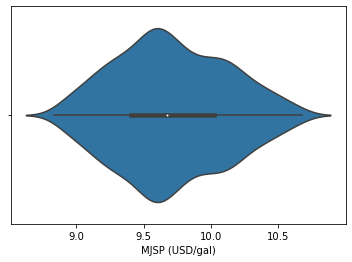

In [7]:
sb.violinplot(
    saf_sot.xs(
        ("HEFA Camelina", "State of Technology", "Metric", "MJSP"),
        level = ("Technology", "Scenario", "Variable", "Index")
    )["Value"]
).set(xlabel = "MJSP (USD/gal)");

And another violin plot for the same metric and the ATJ Corn Dry Mill technology:

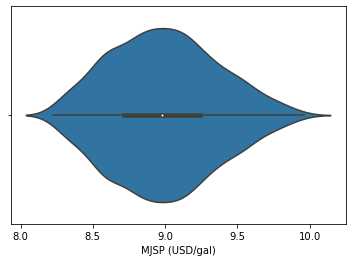

In [8]:
sb.violinplot(
    saf_sot.xs(
        ("ATJ Corn Dry Mill", "State of Technology", "Metric", "MJSP"),
        level = ("Technology", "Scenario", "Variable", "Index")
    )["Value"]
).set(xlabel = "MJSP (USD/gal)");

## Simulate effects of R&D.

### Simulating implications of expert elicitation.

In [9]:
saf_experts = designs.evaluate_scenarios(sample_count=1000)
saf_experts

Value  \
Technology         Scenario            Sample Variable Index                       
ATJ Corn Dry Mill  Incremental         1      Cost     Cost         8.261330e+06   
                                              Metric   Jet GHG      7.582725e-02   
                                                       MJSP         8.932826e+00   
                                              Output   DDGS         4.011863e+07   
                                                       Diesel       4.011863e+07   
...                                                                          ...   
HEFA Yellow Grease State of Technology 1000   Output   Diesel       4.860644e+07   
                                                       Electricity  4.860644e+07   
                                                       Gasoline     4.860644e+07   
                                                       Jet          4.860644e+07   
                                                       Propane      4.860644e+07   

                                                                          Units  
Technology         Scenario            Sample Variable Index                     
ATJ Corn Dry Mill  Incremental         1      Cost     Cost            USD/year  
                                              Metric   Jet GHG      kg CO2eq/MJ  
                                                       MJSP             USD/gal  
                                              Output   DDGS             kg/year  
                                                       Diesel          gal/year  
...                                                                         ...  
HEFA Yellow Grease State of Technology 1000   Output   Diesel          gal/year  
                                                       Electricity     kWh/year  
                                                       Gasoline        gal/year  
                                                       Jet             gal/year  
                                                       Propane         gal/year  

[252000 rows x 2 columns]

Make violin plots showing the implications of the expert opinions

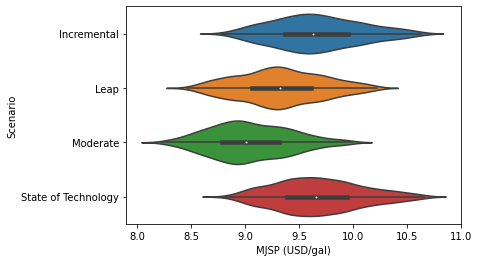

In [10]:
sb.violinplot(
    y = "Scenario",
    x = "Value",
    data = saf_experts.xs(
        ("HEFA Camelina", "Metric", "MJSP"),
        level = ("Technology", "Variable", "Index")
    ).reset_index()
).set(xlabel = "MJSP (USD/gal)");

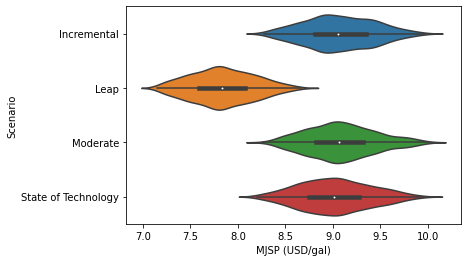

In [11]:
sb.violinplot(
    y = "Scenario",
    x = "Value",
    data = saf_experts.xs(
        ("ATJ Corn Dry Mill", "Metric", "MJSP"),
        level = ("Technology", "Variable", "Index")
    ).reset_index()
).set(xlabel = "MJSP (USD/gal)");

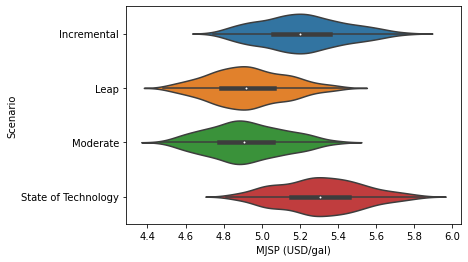

In [12]:
sb.violinplot(
    y = "Scenario",
    x = "Value",
    data = saf_experts.xs(
        ("HEFA Yellow Grease", "Metric", "MJSP"),
        level = ("Technology", "Variable", "Index")
    ).reset_index()
).set(xlabel = "MJSP (USD/gal)");

## Analyzing investments.

### Simulate the base case or reference scenario.

#### Load the data.

In [90]:
saf_designs = ty.Designs("data/saf")

In [91]:
saf_investments = ty.Investments("data/saf")

#### Compile the production and metric functions for each technology in the dataset.

In [92]:
saf_designs.compile()

#### Simulate the base case.

In [93]:
saf_investment_results = saf_investments.evaluate_investments(saf_designs,
                                                              sample_count=1000)

Here are the metrics for the base case:

In [98]:
saf_investment_results.metrics

Value  \
Investment Category                   Tranche Scenario            Sample Technology         Index               
Low R&D    Co-Product Revenue         CPR In  Incremental         1.0    ATJ Corn Dry Mill  Jet GHG  0.076217   
                                                                                            MJSP     9.856628   
                                                                  2.0    ATJ Corn Dry Mill  Jet GHG  0.079412   
                                                                                            MJSP     9.533981   
                                                                  3.0    ATJ Corn Dry Mill  Jet GHG  0.080796   
...                                                                                                       ...   
No R&D     Fatty Acid Composition     FAC SoT State of Technology 999.0  HEFA Yellow Grease Jet GHG  0.017493   
                                                                                            MJSP     5.412197   
                                                                  1000.0 HEFA Yellow Grease Jet GHG  0.017336   
                                                                                            MJSP     5.313773   
           Overall Process Efficiency OpE SoT NaN                 NaN    NaN                NaN           NaN   

                                                                                                           Units  
Investment Category                   Tranche Scenario            Sample Technology         Index                 
Low R&D    Co-Product Revenue         CPR In  Incremental         1.0    ATJ Corn Dry Mill  Jet GHG  kg CO2eq/MJ  
                                                                                            MJSP         USD/gal  
                                                                  2.0    ATJ Corn Dry Mill  Jet GHG  kg CO2eq/MJ  
                                                                                            MJSP         USD/gal  
                                                                  3.0    ATJ Corn Dry Mill  Jet GHG  kg CO2eq/MJ  
...                                                                                                          ...  
No R&D     Fatty Acid Composition     FAC SoT State of Technology 999.0  HEFA Yellow Grease Jet GHG  kg CO2eq/MJ  
                                                                                            MJSP         USD/gal  
                                                                  1000.0 HEFA Yellow Grease Jet GHG  kg CO2eq/MJ  
                                                                                            MJSP         USD/gal  
           Overall Process Efficiency OpE SoT NaN                 NaN    NaN                NaN              NaN  

[154001 rows x 2 columns]

Here is the cost for the base case:

In [63]:
saf_investment_results.amounts

,Amount
Investment,
High R&D,102000000.0
Low R&D,53000000.0
Moderate R&D,74000000.0
No R&D,0.0


### Investment cases.

Now we create investment cases corresponding to the scenarios that were the focus of the expert elicitation:

In [95]:
saf_investments.tranches

Amount Notes
Category                   Tranche Scenario                             
Co-Product Revenue         CPR In  Incremental          18000000.0      
                           CPR Le  Leap                 28000000.0      
                           CPR Mo  Moderate             22000000.0      
                           CPR SoT State of Technology         0.0      
Fatty Acid Composition     FAC In  Incremental          20000000.0      
                           FAC Le  Leap                 39000000.0      
                           FAC Mo  Moderate             27000000.0      
                           FAC SoT State of Technology         0.0      
Overall Process Efficiency OPE In  Incremental          15000000.0      
                           OPE Le  Leap                 35000000.0      
                           OPE Mo  Moderate             25000000.0      
                           OPE SoT State of Technology         0.0

#### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [99]:
tranche_results = saf_investments.evaluate_tranches(saf_designs,
                                                    sample_count=1000)

The tranche amounts are simple how much each tranche costs.

In [101]:
tranche_results.amounts.reset_index().sort_values(["Category", "Amount"]).set_index(["Category", "Tranche"])

Amount
Category                   Tranche            
Co-Product Revenue         CPR SoT         0.0
                           CPR In   18000000.0
                           CPR Mo   22000000.0
                           CPR Le   28000000.0
Fatty Acid Composition     FAC SoT         0.0
                           FAC In   20000000.0
                           FAC Mo   27000000.0
                           FAC Le   39000000.0
Overall Process Efficiency OPE SoT         0.0
                           OPE In   15000000.0
                           OPE Mo   25000000.0
                           OPE Le   35000000.0

The tranch metrics show the values of each metric for each member of the ensemble of simulations.

In [103]:
tranche_results.metrics

Value  \
Category                   Tranche Scenario            Sample Technology         Index               
Co-Product Revenue         CPR In  Incremental         1      ATJ Corn Dry Mill  Jet GHG  0.079735   
                                                                                 MJSP     9.324083   
                                                       2      ATJ Corn Dry Mill  Jet GHG  0.076482   
                                                                                 MJSP     9.336694   
                                                       3      ATJ Corn Dry Mill  Jet GHG  0.082207   
...                                                                                            ...   
Overall Process Efficiency OPE SoT State of Technology 998    HEFA Yellow Grease MJSP     5.326286   
                                                       999    HEFA Yellow Grease Jet GHG  0.017047   
                                                                                 MJSP     5.272752   
                                                       1000   HEFA Yellow Grease Jet GHG  0.016348   
                                                                                 MJSP     5.068966   

                                                                                                Units  
Category                   Tranche Scenario            Sample Technology         Index                 
Co-Product Revenue         CPR In  Incremental         1      ATJ Corn Dry Mill  Jet GHG  kg CO2eq/MJ  
                                                                                 MJSP         USD/gal  
                                                       2      ATJ Corn Dry Mill  Jet GHG  kg CO2eq/MJ  
                                                                                 MJSP         USD/gal  
                                                       3      ATJ Corn Dry Mill  Jet GHG  kg CO2eq/MJ  
...                                                                                               ...  
Overall Process Efficiency OPE SoT State of Technology 998    HEFA Yellow Grease MJSP         USD/gal  
                                                       999    HEFA Yellow Grease Jet GHG  kg CO2eq/MJ  
                                                                                 MJSP         USD/gal  
                                                       1000   HEFA Yellow Grease Jet GHG  kg CO2eq/MJ  
                                                                                 MJSP         USD/gal  

[168000 rows x 2 columns]

#### Prepare results for optimization.

The following will be automated, so we won't go into details here.

In [104]:
z_mjsp = tranche_results.metrics.xs("MJSP", level = "Index", drop_level = False)

In [105]:
z_ghg = tranche_results.metrics.xs("Jet GHG", level = "Index", drop_level = False)

<AxesSubplot:>

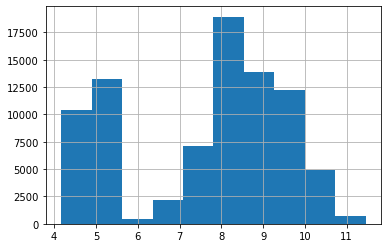

In [106]:
z_mjsp.Value.hist()

<AxesSubplot:>

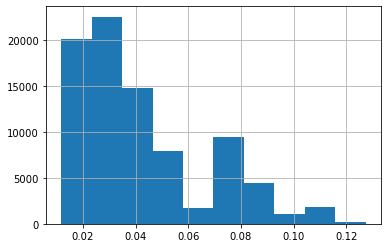

In [107]:
z_ghg.Value.hist()

In [35]:
z_reference = np.mean(z.xs("Base Case")["Value"])
z_reference

KeyError: 'State of Technology'

In [49]:
z["Value"] = z_reference - z["Value"]

/nix/store/h4fw31iyvnvyvfcfx4p5lxs6z78hq67g-python3-3.7.6-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
z = z[z.index.get_level_values(0) != "Base Case"]

#### The `Evaluator` object provides convenient access to the simulation results.

In [111]:
evaluator = ty.Evaluator(saf_investments.tranches, tranche_results.metrics)

#### Query the maximum investments possible in each category.

In [112]:
evaluator.max_amount

,Amount
Category,
Co-Product Revenue,28000000.0
Fatty Acid Composition,39000000.0
Overall Process Efficiency,35000000.0


Query the units of measure for each metric.

In [113]:
evaluator.units

,Units
Index,
Jet GHG,kg CO2eq/MJ
MJSP,USD/gal


In [114]:
evaluator.metrics

array(['Jet GHG', 'MJSP'], dtype=object)

#### Create the optimizer.

In [115]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

#### Query the maximum values attainable for each metric.

In [116]:
metric_max = optimizer.max_metrics()
#z_reference - metric_max
metric_max

Jet GHG     0.164076
MJSP       23.999682
Name: Value, dtype: float64

#### Find the lowest LCOE if only \$5M can be spent.

In [117]:
w = optimizer.maximize_slsqp(
    "MJSP",
    total_amount = 102000000,
)
w[1]

'Optimization terminated successfully'

Investment amounts

In [118]:
w[2]

Category
Co-Product Revenue            0.0
Fatty Acid Composition        0.0
Overall Process Efficiency    0.0
Name: Amount, dtype: float64

Resulting metric.

In [119]:
w[3]

Index
Jet GHG     0.130669
MJSP       23.999682
Name: Value, dtype: float64

#### Find the lowest LCOE if only 5M USD can be spent and only 2M USD can be spent in each category.

In [55]:
w = optimizer.maximize_slsqp(
    "MJSP",
    total_amount = 5000000,
    max_amount = pd.Series(
        [2000000, 2000000, 2000000],
        index=["Rotor Investment Only", "Drive Investment Only", "Tower Investment Only"]
    )
)
w[1]

'Optimization terminated successfully'

Investment amounts

In [56]:
w[2]

Category
Co-Product Revenue            0.0
Fatty Acid Composition        0.0
Overall Process Efficiency    0.0
Name: Amount, dtype: float64

Resulting metric.

In [57]:
w[3]

Index
MJSP    167.903639
Name: Value, dtype: float64